<a href="https://colab.research.google.com/github/holman57/Business-Intelligence-Dashboard/blob/main/examples/Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly Examples

- https://www.educative.io/courses/interactive-dashboards-and-data-apps-with-plotly-and-dash/data-and-layout-attributes

In [1]:
!pip uninstall plotly -y

Found existing installation: plotly 5.22.0
Uninstalling plotly-5.22.0:
  Successfully uninstalled plotly-5.22.0


In [2]:
!pip install plotly

  Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)


In [3]:
!pip show plotly

Name: plotly
Version: 5.22.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, tenacity
Required-by: cufflinks, datascience, geemap


In [28]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [5]:
fig = go.Figure()
fig.add_scatter(x=[1, 2, 3], y=[4, 2, 3])
fig.show()

## Add Multiple Lines Per-Plot

In [6]:
fig = go.Figure()
fig.add_scatter(x=[1, 2, 3], y=[4, 2, 3])
fig.add_scatter(x=[1, 2, 3, 4], y=[4, 5, 2, 3])
fig.show()

## Some of the Figure object's layout.xaxis options

* tickfont
* tickformat
* tickformatstopdefaults
* tickformatstops
* ticklabelmode
* ticklen
* tickmode
* tickprefix
* ticks
* tickson


In [7]:
fig = go.Figure()
fig.add_scatter(x=[1, 2, 3], y=[4, 2, 3])
fig.add_scatter(x=[1, 2, 3, 4], y=[4, 5, 2, 3])
fig.layout.title = 'The Figure Title'
fig.layout.xaxis.title = 'The X-axis title'
fig.layout.yaxis.title = 'The Y-axis title'
fig.show()

## Interactively exploring the Figure object

In [8]:
fig.show('json')

In [9]:
fig.show(config={'displaylogo': False,
                'modeBarButtonsToAdd': ['drawrect',
                                        'drawcircle',
                                        'eraseshape']})

* `displayModeBar`: This defaults to `True`. It controls whether or not to display the whole mode bar.

* `responsive`: This defaults to `True`. It controls whether or not to change the dimensions of the figure based on the browser window’s size. Sometimes, we might want to keep the figure dimensions fixed.

* `toImageButtonOptions`: The camera icon in the mode bar allows users to download the figure as an image. This option controls the default formats of downloading those images. It takes a dictionary in which we can set the default format (that is, SVG, PNG, JPG, or WebP). We can also set default values for the height, width, file name, and scale.

* `modeBarButtonsToRemove`: This is a list of buttons we don’t want in the mode bar.

In [10]:
fig.write_html('html_plot.html',
   config={'toImageButtonOptions':
      {'format': 'svg'}})

In [11]:
!ls -l html_plot.html

-rw-r--r-- 1 root root 3640336 Jun  2 01:28 html_plot.html


In [12]:
# !pip install -U kaleido
# fig.write_image('image_file.svg', height=600, width=850)

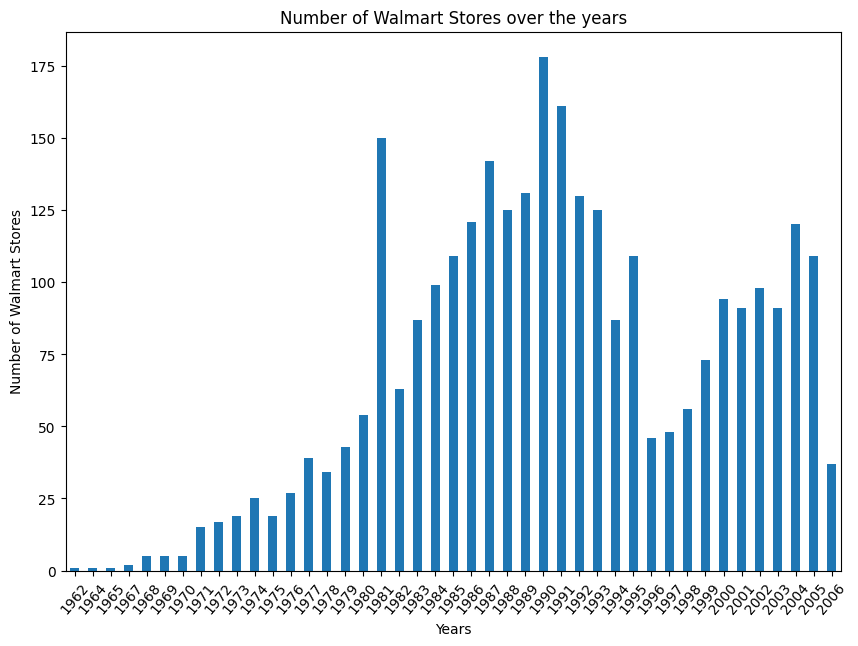

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
plt.figure(figsize=(10, 7))
fig = df['YEAR'].value_counts().sort_index().plot(kind='bar').figure
plt.xlabel("Years")
plt.xticks(rotation=50, horizontalalignment="center")
plt.title("Number of Walmart Stores over the years")
plt.ylabel("Number of Walmart Stores")
plt.show()
fig.savefig('walmart.png')
plt.close(fig)

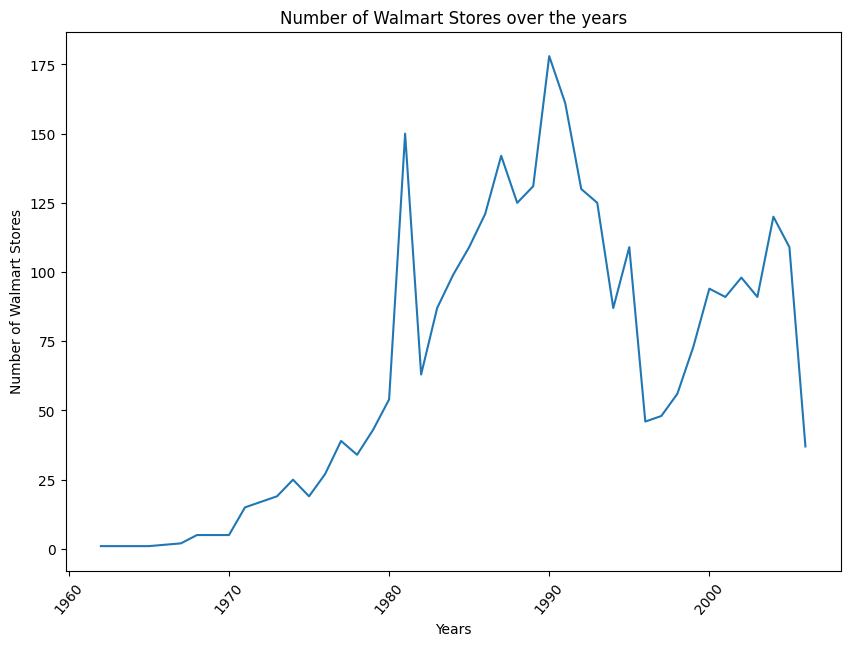

In [14]:
plt.figure(figsize=(10, 7))
fig = df['YEAR'].value_counts().sort_index().plot.line().figure
plt.xlabel("Years")
plt.xticks(rotation=50, horizontalalignment="center")
plt.title("Number of Walmart Stores over the years")
plt.ylabel("Number of Walmart Stores")
plt.show()
fig.savefig('walmart2.png')
plt.close(fig)

In [15]:
gapminder = px.data.gapminder()
px.scatter(data_frame=gapminder,
          x='gdpPercap',
          y='lifeExp',
          size='pop',
          facet_col='continent',
          color='continent',
          title='Life Expectancy and GDP per capita. 1952 - 2007',
          labels={'gdpPercap': 'GDP per Capita',
                  'lifeExp': 'Life Expectancy'},
          log_x=True,
          range_y=[20, 100],
          hover_name='country',
          animation_frame='year',
          height=600,
          size_max=90)

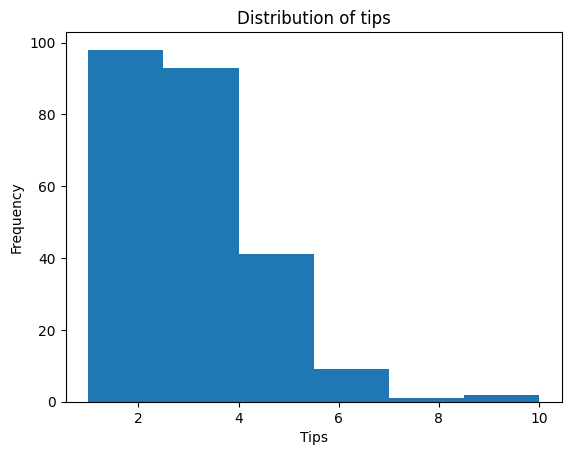

In [16]:
tips_data = plotly.data.tips()
plt.hist(tips_data['tip'], bins=6)
plt.xlabel("Tips")
plt.ylabel("Frequency")
plt.title("Distribution of tips")
plt.savefig('Histagram.png')
plt.close(fig)

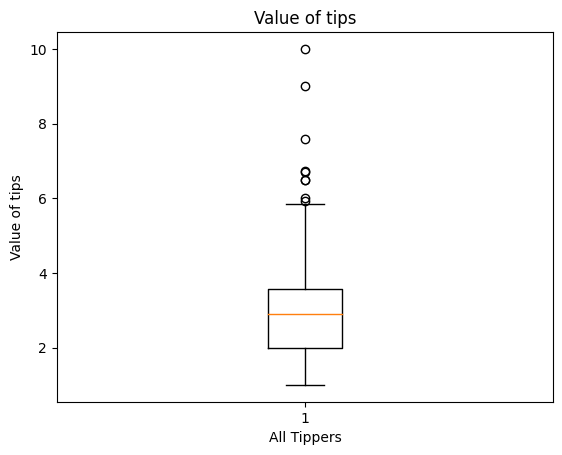

In [17]:
tips_data = plotly.data.tips()
plt.xlabel("All Tippers")
plt.ylabel("Value of tips")
plt.title("Value of tips")
plt.boxplot(tips_data['tip'])
plt.savefig('Tips.png')
plt.close(fig)

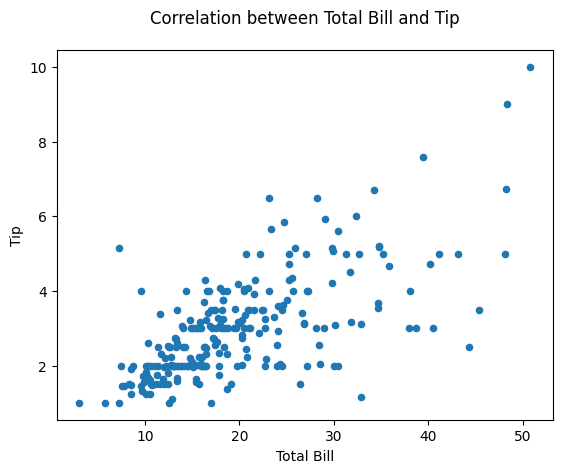

In [18]:
fig = tips_data.plot.scatter(x='total_bill', y='tip').figure
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Correlation between Total Bill and Tip", y=1.05)
plt.show()
fig.savefig('Scatter.png')
plt.close(fig)

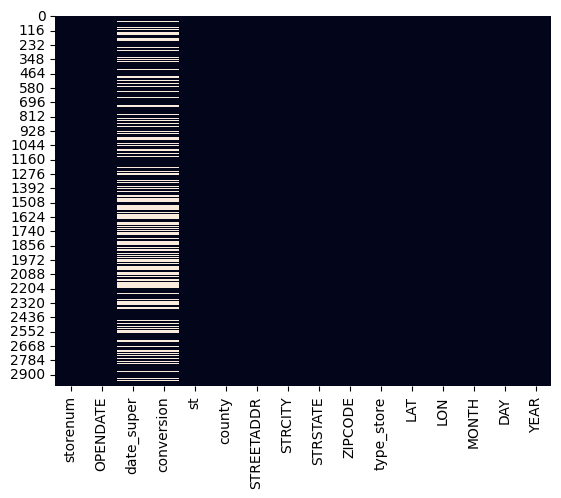

In [19]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()
plt.savefig('seaborn.png')
plt.close()

On the x-axis, we have the index of the dataset plotted, and we have our variables plotted on the y-axis. In this hypothetical dataset, we have no missing values for the Opt-in? field as expected, given this variable is the only required field. We can see several different missing values for the remaining three variables, particularly for Age and Role.




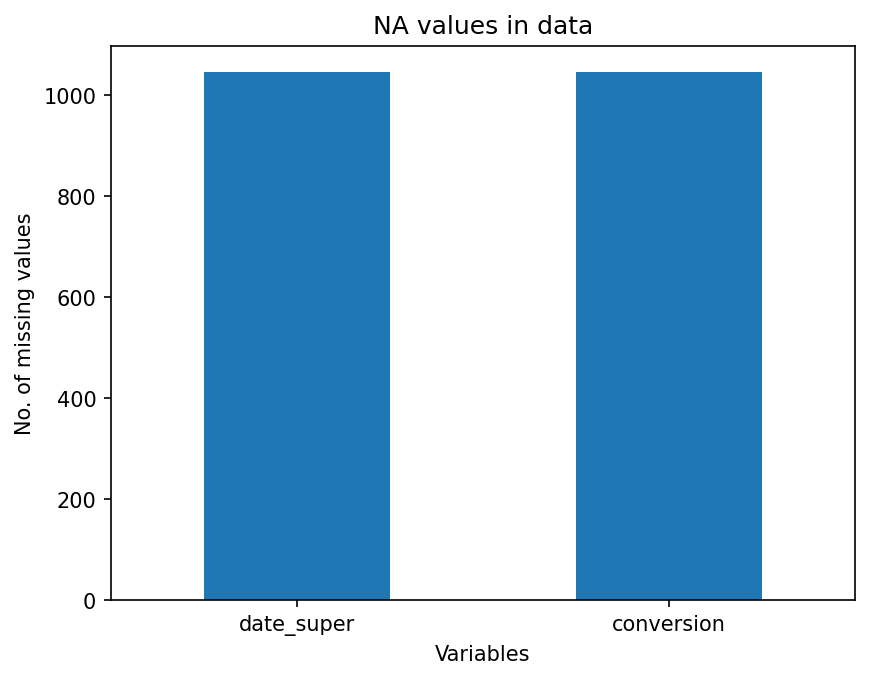

In [20]:
# Defining matplotlib plot layout (dpi=scale)
fig, ax = plt.subplots(dpi=150)
ax.set_xlabel("Variables")
ax.set_ylabel("No. of missing values")
ax.set_title("NA values in data")
#Plot the number of NA values as a bar plot
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')
#Rotate the x-axis labels so they are visible
plt.xticks(rotation=0)
plt.show()
plt.savefig('missing_values.png')
plt.close()

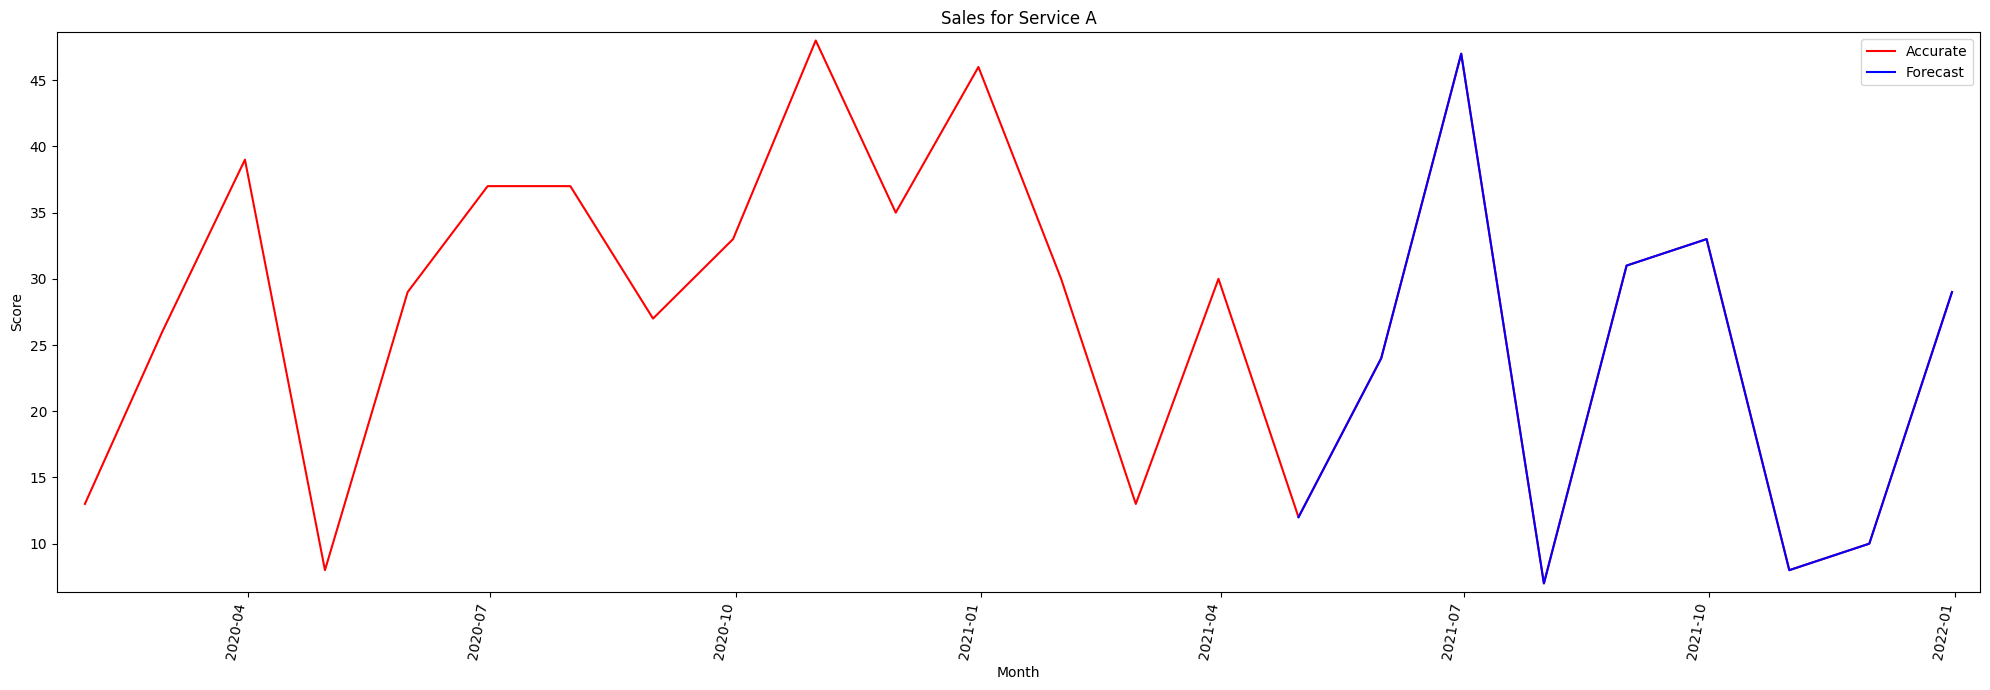

In [21]:
np.random.seed(55)
#Create a date_range to get our x-axis
index = pd.date_range(start='2020', end='2022', freq='M')
#Generate random integers to represent Sales data
sales_df = pd.DataFrame({'sales': np.random.randint(0, 50, size=(len(index)))}, index=index)

fig, ax = plt.subplots(figsize=(20, 7))

#For the first half of the plot, plot the "Accurate"/Correct forecast
ax.plot(sales_df.index, sales_df.sales.values, color='red', label='Accurate')
#For the last 15 values, indicate these as the Forecasted values
#In a real-world application, these values would be generated
#by a forecasting algorithm/machine learning model.
ax.plot(sales_df.index[15:], sales_df.sales.values[15:], color='blue', label='Forecast')

ax.legend()
ax.set(title='Sales for Service A', xlabel='Month', ylabel='Score')
ax.margins(0.015, tight=True)
fig.autofmt_xdate(rotation=80)

fig.tight_layout()
plt.show()
fig.savefig('forecasting.png')
plt.close(fig)

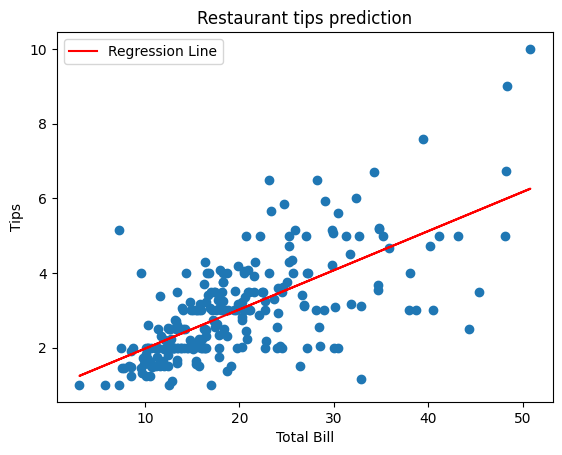

In [27]:
#Load and pre-process the data
df = px.data.tips()

#Define total_bill as the x variable
X = df.total_bill.values.reshape(-1, 1)

#Define tip as the y variable
y = df.tip

#Define and train the model
model = LinearRegression()
model.fit(X, y)

#Plot a scatter plot of the original data
fig = plt.scatter(X, y).figure

#Plot the linear regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Total Bill")
plt.ylabel("Tips")
plt.title("Restaurant tips prediction")
plt.legend()
plt.show()
fig.savefig('linear_regression.png')
plt.close(fig)

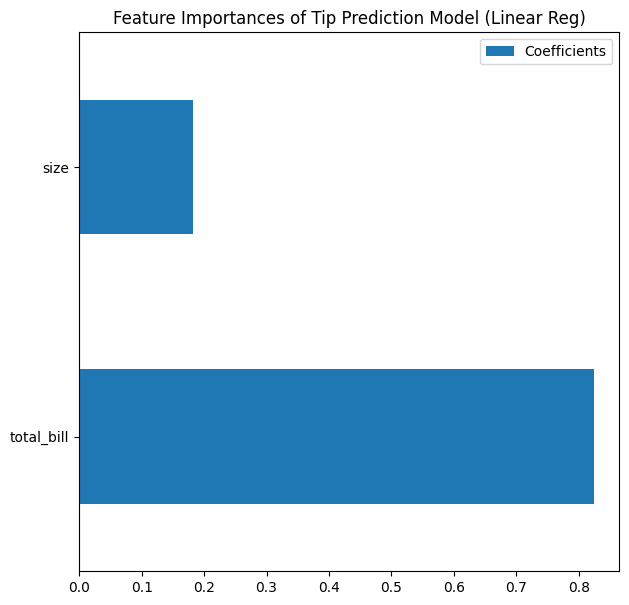

In [30]:
#Load the tips dataset
df = px.data.tips()

#Create a subset with the total_bill and size variables for our features
X = df[['total_bill', 'size']]

#Create a sklearn machine learning pipeline
#The first step is scaling the data, then defining a Linear Regression model
model = make_pipeline(StandardScaler(), LinearRegression())

#Train the model on the tips subset, specifying `tips` as the variable
#we want to predict.
model.fit(X, df.tip)

#Extract the coefficients from the Linear Reg model and create a dataframe
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=X.columns
)

#Plot the coefficients as a horizontal bar plot
#The "taller" the bar with regards to the x-axis, the greater the
#feature importance
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Importances of Tip Prediction Model (Linear Reg)')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()
plt.savefig('side_bar.png')
plt.close()

In [23]:
!ls -l

total 3880
-rw-r--r-- 1 root root   87736 Jun  2 01:24 asdf.png
-rw-r--r-- 1 root root   87736 Jun  2 01:28 forecasting.png
-rw-r--r-- 1 root root   12460 Jun  2 01:28 Histagram.png
-rw-r--r-- 1 root root 3640336 Jun  2 01:28 html_plot.html
-rw-r--r-- 1 root root    2396 Jun  2 01:28 missing_values.png
drwxr-xr-x 1 root root    4096 May 30 13:36 sample_data
-rw-r--r-- 1 root root   22914 Jun  2 01:28 Scatter.png
-rw-r--r-- 1 root root    2396 Jun  2 01:28 seaborn.png
-rw-r--r-- 1 root root   12810 Jun  2 01:28 Tips.png
-rw-r--r-- 1 root root   48780 Jun  2 01:28 walmart2.png
-rw-r--r-- 1 root root   32632 Jun  2 01:28 walmart.png
